# Peer-graded Assignment: Capstone Project - The Battle of Neighborhoods

**Aleksandr Plotnikow** 



In [1]:

!pip install folium==0.5.0
!pip install geopy
print('done')


"\n!pip install folium==0.5.0\n!pip install geopy\nprint('done')\n"

Import libraries

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation


from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize


import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [3]:
class City:
    geolocator = Nominatim(user_agent="foursquare_agent")
    def __init__(self, city):
        self.city = city
        self.location = City.geolocator.geocode(self.city)
        self.latitude = self.location.latitude
        self.longitude = self.location.longitude
    
    def getData(self):
        print(self.location, ", ",self.latitude,", ", self.longitude)
    

Get access to FourSquare

In [4]:
CLIENT_ID = 'BGYPI25UF4ZDGPNJCK2EJIHKQYVI2XTBFWOCY5PQTXKZE2VH' # your Foursquare ID
CLIENT_SECRET = 'D33LBETQKFZORUZ1MEAMF4LCDZRDRIZYEKCYV4AUWICHU51V' # your Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BGYPI25UF4ZDGPNJCK2EJIHKQYVI2XTBFWOCY5PQTXKZE2VH
CLIENT_SECRET:D33LBETQKFZORUZ1MEAMF4LCDZRDRIZYEKCYV4AUWICHU51V


In [5]:
the_city = City("Toulouse")

In [6]:
the_city.getData()

Toulouse, Haute-Garonne, Occitanie, France métropolitaine, 31000, France ,  43.6044622 ,  1.4442469


The function that filters answer from FourSquare

In [7]:
def url_search(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    venues = results['response']['venues']
    dataframe = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
    dataframe_filtered = dataframe.loc[:, filtered_columns]
    for x in dataframe_filtered.columns:
        if "location." in x:
            y = x.replace("location.","")
            dataframe_filtered.rename(columns={x: y},inplace=True)
    if  search_query == "Metro":   
        for index in dataframe_filtered.index:
            if not "Ⓐ" in dataframe_filtered.loc[index,'name']:
                if not "Ⓑ" in dataframe_filtered.loc[index,'name']:
                    dataframe_filtered = dataframe_filtered.drop([index])
        for index in dataframe_filtered.index:
            if "Ⓐ" or "Ⓑ" in dataframe_filtered.loc[index,'name']:
                dataframe_filtered.loc[index,'name']="Metro Station"
            
         
        
    return dataframe_filtered

Database creation for shushi, kebab, gym and metro

In [85]:
radius = 5000

dataframe = url_search(CLIENT_ID, CLIENT_SECRET, the_city.latitude, the_city.longitude,ACCESS_TOKEN, VERSION, 'Metro', radius, LIMIT)

dataframe_sushi = url_search(CLIENT_ID, CLIENT_SECRET, the_city.latitude, the_city.longitude,ACCESS_TOKEN, VERSION, 'Sushi', radius, LIMIT)

dataframe_kebab = url_search(CLIENT_ID, CLIENT_SECRET, the_city.latitude, the_city.longitude,ACCESS_TOKEN, VERSION, 'Kebab', radius, LIMIT)

dataframe_gym = url_search(CLIENT_ID, CLIENT_SECRET, the_city.latitude, the_city.longitude,ACCESS_TOKEN, VERSION, 'Basic Fit', radius, LIMIT)


In [86]:

dataframe_sushi = dataframe_sushi[~dataframe_sushi['name'].isin(["Sushi"])]

for index in dataframe_sushi.index:
    dataframe_sushi.loc[index,'name']="Sushi"

dataframe_sushi.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Sushi,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",4-8 Rue de Lapeyrouse,FR,Toulouse,France,NaN,182,"[4-8 Rue de Lapeyrouse, 31000 Toulouse, France]","[{'label': 'display', 'lat': 43.60391999980114...",43.603920,1.446382,31000,Midi-Pyrénées,4ca1d01c2fb1a14323b30741
1,Sushi,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",58 boulevard Lazare Carnot,FR,Toulouse,France,NaN,460,"[58 boulevard Lazare Carnot, 31000 Toulouse, F...","[{'label': 'display', 'lat': 43.604882, 'lng':...",43.604882,1.449929,31000,Midi-Pyrénées,50cdd13be4b0b76cde0d68b0
2,Sushi,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",31 Rue des Frères Lion,FR,Toulouse,France,Rue De Metz,820,"[31 Rue des Frères Lion (Rue De Metz), 31000 T...","[{'label': 'display', 'lat': 43.60026202245562...",43.600262,1.452615,31000,Midi-Pyrénées,4c63e312de1b2d7f36c2e570
3,Sushi,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",2 place saint cyprien,FR,Toulouse,France,NaN,1256,"[2 place saint cyprien, 31300 Toulouse, France]","[{'label': 'display', 'lat': 43.59787898242894...",43.597879,1.431580,31300,Midi-Pyrénées,4ed68ce69a529c405be57899
4,Sushi,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",NaN,FR,NaN,France,NaN,165,[France],"[{'label': 'display', 'lat': 43.60407172809238...",43.604072,1.446232,NaN,NaN,539b307f498ec2230a4bd725
5,Sushi,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",NaN,FR,NaN,France,NaN,201,[France],"[{'label': 'display', 'lat': 43.605505, 'lng':...",43.605505,1.442210,NaN,NaN,4ed247c19adf254459246977
6,Sushi,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",34-36 rue Boulbonne,FR,Toulouse,France,NaN,496,"[34-36 rue Boulbonne, 31000 Toulouse, France]","[{'label': 'display', 'lat': 43.60102320586836...",43.601023,1.448165,31000,Midi-Pyrénées,4c5f0874d25320a15a53ca7a
7,Sushi,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",16 Boulevard de Strasbourg,FR,Toulouse,France,NaN,407,"[16 Boulevard de Strasbourg, 31000 Toulouse, F...","[{'label': 'display', 'lat': 43.60725118419315...",43.607251,1.447512,31000,Midi-Pyrénées,53579962498ec5d549031e91
8,Sushi,"[{'id': '4bf58dd8d48988d1d1941735', 'name': 'N...","30, Rue Léon Gambetta",FR,Toulouse,France,NaN,276,"[30, Rue Léon Gambetta, 31000 Toulouse, France]","[{'label': 'display', 'lat': 43.602876, 'lng':...",43.602876,1.441600,31000,Midi-Pyrénées,5558db70498e3205ba180312
9,Sushi,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",NaN,FR,NaN,France,NaN,606,[France],"[{'label': 'display', 'lat': 43.59901413956892...",43.599014,1.444079,NaN,NaN,4c1214d7b7b9c9286d16a737


In [87]:
dataframe_kebab = dataframe_kebab[~dataframe_kebab['name'].isin(["Kebab"])]

for index in dataframe_kebab.index:
    dataframe_kebab.loc[index,'name']="Kebab"            
dataframe_kebab.head()

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Kebab,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",21 rue des Filatiers,FR,Toulouse,France,641,"[21 rue des Filatiers, Toulouse, France]","[{'label': 'display', 'lat': 43.5987014724917,...",43.598701,1.444125,NaN,Midi-Pyrénées,4cb44467ef1b37042b4e5700
1,Kebab,"[{'id': '5283c7b4e4b094cb91ec88d7', 'name': 'K...","6, Rue des Lois",FR,Toulouse,France,161,"[6, Rue des Lois, 31000 Toulouse, France]","[{'label': 'display', 'lat': 43.60502583247506...",43.605026,1.442395,31000,Midi-Pyrénées,4ca719bbd971b1f7c46f06e1
2,Kebab,"[{'id': '4bf58dd8d48988d10e941735', 'name': 'G...",NaN,FR,NaN,France,370,[France],"[{'label': 'display', 'lat': 43.60153198242187...",43.601532,1.442056,NaN,NaN,54044f98498ed729c05aef8f
3,Kebab,"[{'id': '5283c7b4e4b094cb91ec88d7', 'name': 'K...",NaN,FR,Toulouse,France,266,"[Toulouse, France]","[{'label': 'display', 'lat': 43.604658, 'lng':...",43.604658,1.440956,NaN,Midi-Pyrénées,4dc91be2d164033c5737fcf0
4,Kebab,"[{'id': '5283c7b4e4b094cb91ec88d7', 'name': 'K...",NaN,FR,NaN,France,564,[France],"[{'label': 'display', 'lat': 43.60952423033299...",43.609524,1.444640,NaN,NaN,4d67c47ca88a6ea89043e772


In [88]:
#for index in dataframe_gym.index:
#    if not "Basic-Fit" in dataframe_gym.loc[index,'name']:              
#        dataframe_gym = dataframe_gym.drop([index])
dataframe_gym = dataframe_gym[~dataframe_gym['name'].isin(["Basic-Fit"])]
for index in dataframe_gym.index:
    dataframe_gym.loc[index,'name']="Gym"            
dataframe_gym.head(50)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Gym,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",Allée Jean Jaurès 58,FR,Toulouse,France,NaN,679,"[Allée Jean Jaurès 58, 31000 Toulouse, France]","[{'label': 'display', 'lat': 43.60729738392673...",43.607297,1.451708,31000,Occitanie,5e353b88c146620008f30e50
1,Gym,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",Esplanade compans caffarelli 3,FR,Toulouse,France,NaN,1024,"[Esplanade compans caffarelli 3, 31000 Toulous...","[{'label': 'display', 'lat': 43.61111, 'lng': ...",43.611110,1.435453,31000,Midi-Pyrénées,58b809a0dad263186bf59ec5
2,Gym,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",Chemin du Sang du Serp 140,FR,Toulouse,France,NaN,2456,"[Chemin du Sang du Serp 140, 31200 Toulouse, F...","[{'label': 'display', 'lat': 43.6205742, 'lng'...",43.620574,1.423420,31200,Occitanie,5e3b066875e0a60007e74c34
3,Gym,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",Faubourg Bonnefoy 14,FR,Toulouse,France,NaN,1566,"[Faubourg Bonnefoy 14, 31000 Toulouse, France]","[{'label': 'display', 'lat': 43.6166937, 'lng'...",43.616694,1.453869,31000,Midi-Pyrénées,5e56ac60ae8c7d0008c07c58
4,Gym,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",avenue de la Marcaissonne 6,FR,Toulouse,France,NaN,5756,"[avenue de la Marcaissonne 6, 31400 Toulouse, ...","[{'label': 'display', 'lat': 43.57198422686249...",43.571984,1.499799,31400,Midi-Pyrénées,5a5360e9bb8d36452d51b5e4
5,Gym,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",Route d'Espagne 39,FR,Toulouse,France,NaN,3405,"[Route d'Espagne 39, 31000 Toulouse, France]","[{'label': 'display', 'lat': 43.5774656, 'lng'...",43.577466,1.424367,31000,Midi-Pyrénées,5e56a7823c6b7a000881ff30
6,Gym,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",Rue de l'Egalité 2,FR,Toulouse,France,NaN,3879,"[Rue de l'Egalité 2, 31200 Toulouse, France]","[{'label': 'display', 'lat': 43.6310013, 'lng'...",43.631001,1.413055,31200,Midi-Pyrénées,5e56aa663ae47d00089a8559
7,Gym,[],NaN,FR,NaN,France,NaN,287,[France],"[{'label': 'display', 'lat': 43.602344, 'lng':...",43.602344,1.442200,NaN,NaN,53490ce6498ee631eae7b4e2
8,Gym,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",11 rue de Bayard,FR,Toulouse,France,NaN,556,"[11 rue de Bayard, 31000 Toulouse, France]","[{'label': 'display', 'lat': 43.60886645046326...",43.608866,1.447505,31000,Midi-Pyrénées,5d9dc6d369e2f900089ea7b1
9,Gym,"[{'id': '4bf58dd8d48988d118951735', 'name': 'G...",16 Allée Charles de Fitte,FR,Toulouse,France,NaN,1409,"[16 Allée Charles de Fitte, 31300 Toulouse, Fr...","[{'label': 'display', 'lat': 43.5943264763695,...",43.594326,1.433775,31300,Midi-Pyrénées,5af58cec8a6f17002cee8ee2


In [91]:
dataframe_sushi.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Sushi,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",4-8 Rue de Lapeyrouse,FR,Toulouse,France,NaN,182,"[4-8 Rue de Lapeyrouse, 31000 Toulouse, France]","[{'label': 'display', 'lat': 43.60391999980114...",43.603920,1.446382,31000,Midi-Pyrénées,4ca1d01c2fb1a14323b30741
1,Sushi,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",58 boulevard Lazare Carnot,FR,Toulouse,France,NaN,460,"[58 boulevard Lazare Carnot, 31000 Toulouse, F...","[{'label': 'display', 'lat': 43.604882, 'lng':...",43.604882,1.449929,31000,Midi-Pyrénées,50cdd13be4b0b76cde0d68b0
2,Sushi,"[{'id': '4bf58dd8d48988d1d2941735', 'name': 'S...",31 Rue des Frères Lion,FR,Toulouse,France,Rue De Metz,820,"[31 Rue des Frères Lion (Rue De Metz), 31000 T...","[{'label': 'display', 'lat': 43.60026202245562...",43.600262,1.452615,31000,Midi-Pyrénées,4c63e312de1b2d7f36c2e570
3,Sushi,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",2 place saint cyprien,FR,Toulouse,France,NaN,1256,"[2 place saint cyprien, 31300 Toulouse, France]","[{'label': 'display', 'lat': 43.59787898242894...",43.597879,1.431580,31300,Midi-Pyrénées,4ed68ce69a529c405be57899
4,Sushi,"[{'id': '4bf58dd8d48988d111941735', 'name': 'J...",NaN,FR,NaN,France,NaN,165,[France],"[{'label': 'display', 'lat': 43.60407172809238...",43.604072,1.446232,NaN,NaN,539b307f498ec2230a4bd725


Getting city data

In [80]:
data_toulouse = pd.read_csv("https://www.data.gouv.fr/fr/datasets/r/ed859e3f-66ce-45c9-aca7-96f06ed26138", sep=';')


In [81]:
data_toulouse[['lat','lng']] = data_toulouse['geo_point_2d'].str.split(',',expand=True)
data_toulouse = data_toulouse.drop(['geo_point_2d', 'geo_shape','telephone','fax','suffixe','num','horaire_ouverture','type','precision_adresse'], axis=1)


In [15]:
list_bool = data_toulouse.duplicated(subset=['mairie'])
for index in data_toulouse.index:
    if data_toulouse.duplicated(subset=['mairie'])[index]==1:
        data_toulouse = data_toulouse.drop([index])
data_toulouse.reset_index(drop=True)


,mairie,libelle,lat,lng
0,DESBALS,RUE HENRI DESBALS,43.5794614874,1.41182827006
1,ORMEAU,AV JEAN RIEUX,43.5790947965,1.48393857924
2,SEPT DENIERS,RTE DE BLAGNAC,43.6143931192,1.41095549564
3,NIEL,RUE SAINT ROCH,43.5786647055,1.44663325604
4,LARDENNE,PL JACQUES SAUVEGRAIN,43.5893565146,1.37853732803
5,MINIMES,PL DU MARCHE AUX COCHONS,43.6205580278,1.43506782814
6,PRADETTES,PAS JULIEN FORGUES,43.5810949456,1.3876461043
7,HOTEL DE VILLE,PL DU CAPITOLE,43.6045483608,1.4441815979
8,MERIEL,RUE PAUL MERIEL,43.6039867361,1.44799600418
9,POUVOURVILLE,CHE DES CLOTASSES,43.5497832911,1.45802324681


In [16]:
data_toulouse = data_toulouse.reset_index(drop=True)


In [93]:
data_toulouse["lng"] = pd.to_numeric(data_toulouse["lng"], downcast="float")
data_toulouse["lat"] = pd.to_numeric(data_toulouse["lat"], downcast="float")



In [199]:
city_map = folium.Map(location=[the_city.latitude, the_city.longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add the Italian restaurants as blue circle markers
for lat, lng, name in zip(dataframe.lat, dataframe.lng, dataframe.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        
    ).add_to(city_map)
    
    
for lat, lng, name in zip(dataframe_sushi.lat, dataframe_sushi.lng, dataframe_sushi.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='yellow',
        popup=name,
        
    ).add_to(city_map)

for lat, lng, name in zip(dataframe_kebab.lat, dataframe_kebab.lng, dataframe_kebab.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        popup=name,
        
    ).add_to(city_map)
    
for lat, lng, name in zip(data_toulouse.lat, data_toulouse.lng, data_toulouse.libelle):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=name,
        
    ).add_to(city_map)

for lat, lng, name in zip(dataframe_gym.lat, dataframe_gym.lng, dataframe_gym.name):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='black',
        popup=name,
        
    ).add_to(city_map)
# display map
city_map

In [106]:
big_data = dataframe.append(dataframe_sushi).append(dataframe_kebab).append(dataframe_gym)
big_data.shape

(119, 15)

In [107]:
big_data = big_data.drop(['categories','city','country','cc','address','crossStreet','distance','labeledLatLngs','postalCode','state','id','formattedAddress'], axis=1)
big_data = big_data.drop_duplicates()

big_data_cluster = big_data.drop(['name'], axis=1)
big_data.head(20)

,lat,lng,name
0,43.604305,1.444976,Metro Station
1,43.605750,1.448709,Metro Station
2,43.600387,1.444091,Metro Station
3,43.608814,1.445504,Metro Station
4,43.610873,1.455045,Metro Station
5,43.600741,1.451898,Metro Station
6,43.597671,1.445410,Metro Station
7,43.610555,1.435481,Metro Station
8,43.592219,1.444616,Metro Station
9,43.598076,1.430835,Metro Station


In [108]:
big_data.shape

(119, 3)

Clustering data, k = number of neigbourhoods

In [109]:
from sklearn.cluster import KMeans

k = data_toulouse.shape[0]
kmeans = KMeans(n_clusters=k).fit(big_data_cluster)
centroids = kmeans.cluster_centers_
kmeans.labels_

array([25, 25,  9, 25,  1, 14,  9, 19, 30,  0, 19,  3, 20, 13, 22,  6,  6,
        6, 20,  4,  3, 13, 22, 10,  4, 27, 16, 29, 17,  8,  7, 10,  7, 20,
        8, 25, 25, 14,  0, 25, 15, 14, 25, 15,  9, 15, 11, 14, 25,  9, 15,
       19,  1,  0, 18,  5, 20, 23,  3, 12, 24,  9, 20, 25,  3, 25, 23, 11,
       19,  5, 31, 31,  9, 15,  9, 15, 25, 14, 25,  1, 15,  1,  9,  9, 19,
       14, 30, 26, 26,  0,  6, 30, 29, 30,  1, 19, 32,  1,  2, 23, 21,  9,
       25,  0, 26,  1, 25, 19, 32,  0,  0, 16, 11, 16, 31,  2,  2, 28, 31],
      dtype=int32)

In [110]:
big_data.insert(0, 'Cluster Labels', kmeans.labels_)

big_data.head()




,Cluster Labels,lat,lng,name
0,25,43.604305,1.444976,Metro Station
1,25,43.605750,1.448709,Metro Station
2,9,43.600387,1.444091,Metro Station
3,25,43.608814,1.445504,Metro Station
4,1,43.610873,1.455045,Metro Station


Map with clusters

In [195]:
map_cluster = folium.Map(location=[the_city.latitude, the_city.longitude],zoom_start=13)

import matplotlib.cm as cm
import matplotlib.colors as colors
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]


markers_colors = []
for lat, lon, name, cluster in zip(big_data.lat, big_data.lng, big_data.name, big_data['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster) + ', ' + name, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='green',
        fill_opacity=0.5).add_to(map_cluster)
for lat, lng, name in zip(data_toulouse.lat, data_toulouse.lng, data_toulouse.libelle):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=name,
        
    ).add_to(map_cluster)
 
map_cluster

In [112]:
big_data = big_data.sort_values(by=['Cluster Labels'])


In [113]:
big_data.shape

(119, 4)

In [114]:
#big_data_filter = big_data.groupby(['Cluster Labels','name']).count().reset_index()
big_data['freq'] = big_data.groupby(['Cluster Labels','name'])['name'].transform('count')

big_data.shape

(119, 5)

In [116]:
big_data_plot = big_data.drop(['lat','lng'], axis=1)
big_data_plot = big_data_plot.drop_duplicates()
big_data_plot = big_data_plot.reset_index(drop=True)

big_data_plot.shape

(61, 3)

In [129]:
def clear_dataframe(df_old, names):
    df = df_old[['Cluster Labels', 'name', 'freq']].copy()

  #  for index in df.index:
  #      if not names in df.loc[index,'name']:              
  #          df = df.drop([index])
            
    df = df[~df['name'].isin([names])]
        
    df=df[['Cluster Labels','freq']]
   # df = df.rename({"freq": names},axis='columns')
    return df






In [163]:
new_data_kebab = big_data_plot[big_data_plot['name'].isin(['Kebab'])]
new_data_kebab = new_data_kebab.rename(columns={"name": "Name of Kebab", "freq": "freq_kebab"})

new_data_sushi = big_data_plot[big_data_plot['name'].isin(['Sushi'])]
new_data_sushi = new_data_sushi.rename(columns={"name": "Name of Sushi", "freq": "freq_sushi"})

new_data_metro = big_data_plot[big_data_plot['name'].isin(['Metro Station'])]
new_data_metro = new_data_metro.rename(columns={"name": "Name of Metro", "freq": "freq_metro"})

new_data_gym = big_data_plot[big_data_plot['name'].isin(['Gym'])]
new_data_gym = new_data_gym.rename(columns={"name": "Name of Gym", "freq": "freq_gym"})

#new_data_metro = clear_dataframe(big_data_plot, "Metro")
#new_data_sushi = clear_dataframe(big_data_plot, "Sushi")
#new_data_kebab = clear_dataframe(big_data_plot, "Kebab")

In [147]:
new_data_kebab

,Cluster Labels,name,freq
0,0,Kebab,1
6,1,Kebab,2
13,6,Kebab,1
17,9,Kebab,4
27,14,Kebab,2
29,15,Kebab,3
36,19,Kebab,1
49,25,Kebab,2
50,26,Kebab,2
54,29,Kebab,1


Filtered data according to clusters

In [173]:
result = pd.merge(new_data_kebab, new_data_sushi,how='outer', on=['Cluster Labels'])
result = pd.merge(result, new_data_gym,how='outer', on=['Cluster Labels'] )
result = pd.merge(result, new_data_metro,how='outer', on=['Cluster Labels'] )
result = result.sort_values(by=['Cluster Labels']).reset_index(drop=True)
result = result.fillna(0)
result

,Cluster Labels,Name of Kebab,freq_kebab,Name of Sushi,freq_sushi,Name of Gym,freq_gym,Name of Metro,freq_metro
0,0,Kebab,1.0,Sushi,2.0,Gym,3.0,Metro Station,1.0
1,1,Kebab,2.0,Sushi,1.0,Gym,3.0,Metro Station,1.0
2,2,0,0.0,0,0.0,Gym,3.0,0,0.0
3,3,0,0.0,Sushi,2.0,0,0.0,Metro Station,2.0
4,4,0,0.0,0,0.0,0,0.0,Metro Station,2.0
5,5,0,0.0,Sushi,2.0,0,0.0,0,0.0
6,6,Kebab,1.0,0,0.0,0,0.0,Metro Station,3.0
7,7,0,0.0,0,0.0,0,0.0,Metro Station,2.0
8,8,0,0.0,0,0.0,0,0.0,Metro Station,2.0
9,9,Kebab,4.0,Sushi,3.0,Gym,1.0,Metro Station,2.0


In [175]:
column_list = ['freq_kebab','freq_sushi','freq_gym','freq_metro']
result["Total"] = result[column_list].sum(axis=1)
result

,Cluster Labels,Name of Kebab,freq_kebab,Name of Sushi,freq_sushi,Name of Gym,freq_gym,Name of Metro,freq_metro,Total
0,0,Kebab,1.0,Sushi,2.0,Gym,3.0,Metro Station,1.0,7.0
1,1,Kebab,2.0,Sushi,1.0,Gym,3.0,Metro Station,1.0,7.0
2,2,0,0.0,0,0.0,Gym,3.0,0,0.0,3.0
3,3,0,0.0,Sushi,2.0,0,0.0,Metro Station,2.0,4.0
4,4,0,0.0,0,0.0,0,0.0,Metro Station,2.0,2.0
5,5,0,0.0,Sushi,2.0,0,0.0,0,0.0,2.0
6,6,Kebab,1.0,0,0.0,0,0.0,Metro Station,3.0,4.0
7,7,0,0.0,0,0.0,0,0.0,Metro Station,2.0,2.0
8,8,0,0.0,0,0.0,0,0.0,Metro Station,2.0,2.0
9,9,Kebab,4.0,Sushi,3.0,Gym,1.0,Metro Station,2.0,10.0


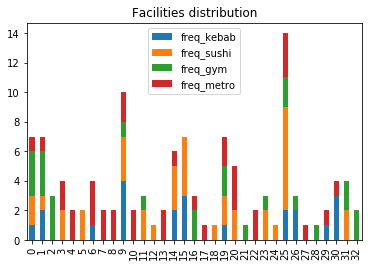

In [255]:
import matplotlib.pyplot as plot
result_to_plot = result[['freq_kebab','freq_sushi','freq_gym','freq_metro']].copy()
result_to_plot.plot.bar(stacked=True,rot=90, title="Facilities distribution");

In [205]:
best_value = result.loc[result['Total'].idxmax()]
best_value

Cluster Labels               25
Name of Kebab             Kebab
freq_kebab                    2
Name of Sushi             Sushi
freq_sushi                    7
Name of Gym                 Gym
freq_gym                      2
Name of Metro     Metro Station
freq_metro                    3
Total                        14
Name: 25, dtype: object

In [200]:
big_data.head(20)

,Cluster Labels,lat,lng,name,freq
17,0,43.594575,1.435737,Kebab,1
3,0,43.597879,1.431580,Sushi,2
9,0,43.594326,1.433775,Gym,3
18,0,43.598755,1.435623,Sushi,2
16,0,43.593913,1.434035,Gym,3
15,0,43.596211,1.431858,Gym,3
9,0,43.598076,1.430835,Metro Station,1
17,1,43.610324,1.452354,Sushi,1
3,1,43.616694,1.453869,Gym,3
9,1,43.609760,1.452118,Kebab,2


In [224]:
index_rows = big_data.loc[big_data['Cluster Labels'] == best_value[0]]
index_rows

,Cluster Labels,lat,lng,name,freq
8,25,43.608866,1.447505,Gym,2
12,25,43.608716,1.447357,Gym,2
0,25,43.604305,1.444976,Metro Station,3
1,25,43.604882,1.449929,Sushi,7
4,25,43.604072,1.446232,Sushi,7
1,25,43.605750,1.448709,Metro Station,3
7,25,43.607251,1.447512,Sushi,7
3,25,43.608814,1.445504,Metro Station,3
13,25,43.610115,1.445661,Sushi,7
6,25,43.605751,1.448892,Kebab,2


Ideal location coordinates

In [237]:
lat_best = index_rows.lat.mean()
lng_best = index_rows.lng.mean()
string = str(lat_best) + ", " + str(lng_best)
string


'43.60688587376357, 1.4471381611552492'

In [265]:

final = data_toulouse.iloc[(data_toulouse['lat']-lat_best).abs().argsort()[:5]]
verdict = final.iloc[(final['lng']-lng_best).abs().argsort()[:1]]
verdict


,mairie,libelle,lat,lng
8,MERIEL,RUE PAUL MERIEL,43.603985,1.447996


Map with ideal place to live

In [278]:
map_place = folium.Map(location=[the_city.latitude, the_city.longitude],zoom_start=13)

folium.Marker(
    [lat_best,lng_best],
    popup='Best Place'
).add_to(map_place)

for lat, lon, name, cluster in zip(big_data.lat, big_data.lng, big_data.name, big_data['Cluster Labels']):
    label = folium.Popup(' Cluster ' + str(cluster) + ', ' + name, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color='green',
        fill_opacity=0.5).add_to(map_place)
for lat, lng, name in zip(data_toulouse.lat, data_toulouse.lng, data_toulouse.libelle):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=name,
        
    ).add_to(map_place)
map_place